# Modulos

In [1]:
import pandas as pd
import plotly.express as px

# Pokemones

In [41]:
data= pd.read_csv("PokemonList.csv")

In [42]:
data.dropna(how='all', inplace=True)

In [43]:
data

,Pokemon,PS,Ataque,Defensa,Ataque Especial,Defensa Especial,Golpe Crítico,Atacante Especial,Critico,Movimiento,Habilidad
0,Wigglytuff,3278.0,130.0,90.0,40.0,80.0,0%,1.0,1.0,2.5,Provoca atracción por un tiempo breve sobre lo...
1,Slowbro,3225.0,150.0,70.0,50.0,60.0,0%,1.0,0.0,1.5,El usuario acumula los PS perdidos por un tiem...
2,Absol,3000.0,140.0,52.0,20.0,36.0,15%,0.0,1.0,4.0,Aumenta la probabilidad de golpe crítico de lo...
3,Greninja,3000.0,146.0,50.0,20.0,30.0,0%,0.0,0.0,3.0,Cuando a este Pokémon le quedan la mitad o men...


# Preprossesing

In [57]:
df= data.copy()

## Scaling

In [58]:
df["PS"] = df["PS"].map(lambda x: x/30)
df["Atacante Especial"]= df["Atacante Especial"].map(lambda x: x*100)
df["Critico"] = df["Critico"].map(lambda x: x*100)
df["Movimiento"] = df["Movimiento"].map(lambda x: x*25)
df["Golpe Crítico"] = df["Golpe Crítico"].map(lambda x: int(str(x).split("%")[0]))

In [59]:
df

,Pokemon,PS,Ataque,Defensa,Ataque Especial,Defensa Especial,Golpe Crítico,Atacante Especial,Critico,Movimiento,Habilidad
0,Wigglytuff,109.266667,130.0,90.0,40.0,80.0,0,100.0,100.0,62.5,Provoca atracción por un tiempo breve sobre lo...
1,Slowbro,107.500000,150.0,70.0,50.0,60.0,0,100.0,0.0,37.5,El usuario acumula los PS perdidos por un tiem...
2,Absol,100.000000,140.0,52.0,20.0,36.0,15,0.0,100.0,100.0,Aumenta la probabilidad de golpe crítico de lo...
3,Greninja,100.000000,146.0,50.0,20.0,30.0,0,0.0,0.0,75.0,Cuando a este Pokémon le quedan la mitad o men...


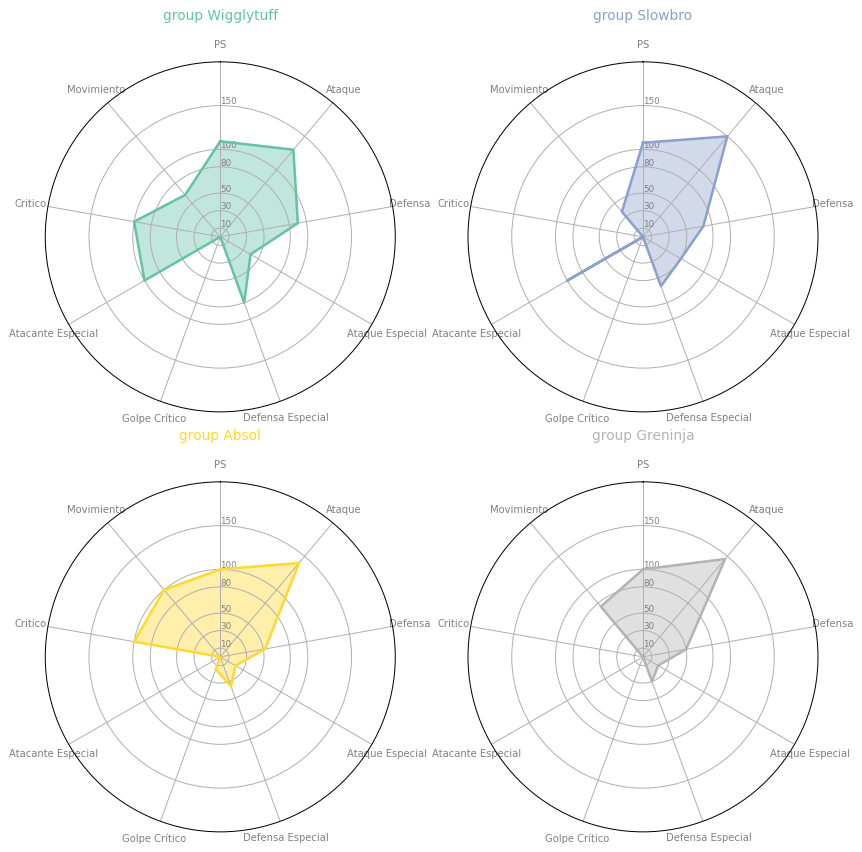

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
#
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:-1]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
      # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,30,50,80,100,150], ["10","30","50","80","100","150"], color="grey", size=7)
    plt.ylim(0,200)

    # Ind1
    values=df.loc[row].drop(['Pokemon', "Habilidad"]).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=90
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['Pokemon'][row], color=my_palette(row))